In [162]:
from google.colab import files
uploaded = files.upload()

Saving AAPL-Apple Inc. Common Stock.csv to AAPL-Apple Inc. Common Stock (5).csv


In [163]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

# Read CSV file
df = pd.read_csv('AAPL-Apple Inc. Common Stock.csv')

# covert df to prequet file to save space and time
table = pa.Table.from_pandas(df)

path = 'asset.parquet'

pq.write_table(table, path)

print(f"CSV file '{df.shape[0]}' rows and '{df.shape[1]}' columns converted to Parquet format.")
print(f"Parquet file saved at '{path}'.")

CSV file '1260' rows and '8' columns converted to Parquet format.
Parquet file saved at 'asset.parquet'.


In [164]:
import pandas as pd

# Specify the path to your Parquet file
path = 'asset.parquet'

df = pd.read_parquet(path)

# Set the index to the DateTimeIndex if applicable
df.set_index('Date', inplace=True)  # Assuming 'Date' is the column containing datetime values

# Drop rows with NaN values
df.dropna(inplace=True)
# first difference

df['Open_diff'] = df['Open'].diff()

df['Open_diff'].fillna(0, inplace=True)

# Print the head of the DataFrame (first few rows)
print(df.head())

                                Open       High        Low      Close  \
Date                                                                    
2019-03-06 00:00:00-05:00  42.038652  42.236007  41.862960  42.002552   
2019-03-07 00:00:00-05:00  41.846107  41.983294  41.400861  41.516384   
2019-03-08 00:00:00-05:00  40.991724  41.653579  40.794369  41.615070   
2019-03-11 00:00:00-04:00  42.236007  43.109654  42.202313  43.056705   
2019-03-12 00:00:00-04:00  43.321448  43.964049  43.169821  43.540462   

                              Volume  Dividends  Stock Splits  Open_diff  
Date                                                                      
2019-03-06 00:00:00-05:00   83241600        0.0           0.0   0.000000  
2019-03-07 00:00:00-05:00   99185600        0.0           0.0  -0.192544  
2019-03-08 00:00:00-05:00   95997600        0.0           0.0  -0.854384  
2019-03-11 00:00:00-04:00  128044000        0.0           0.0   1.244284  
2019-03-12 00:00:00-04:00  129870400  

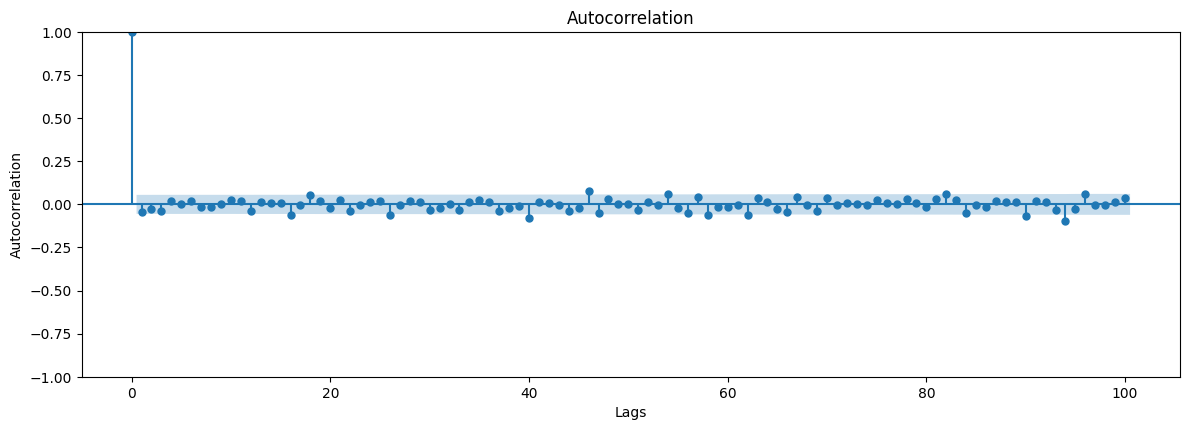

In [181]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# you can see there is no seasonality form the below plot hence we not need to SARIMA for this data

# Plot autocorrelation function (ACF)
plt.figure(figsize=(12, 8))

# ACF plot
plt.subplot(2, 1, 1)
plot_acf(df['Open_diff'], lags=100, ax=plt.gca())  # Adjust 'lags' based on your data's frequency
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

plt.tight_layout()
plt.show()


<Axes: xlabel='Date'>

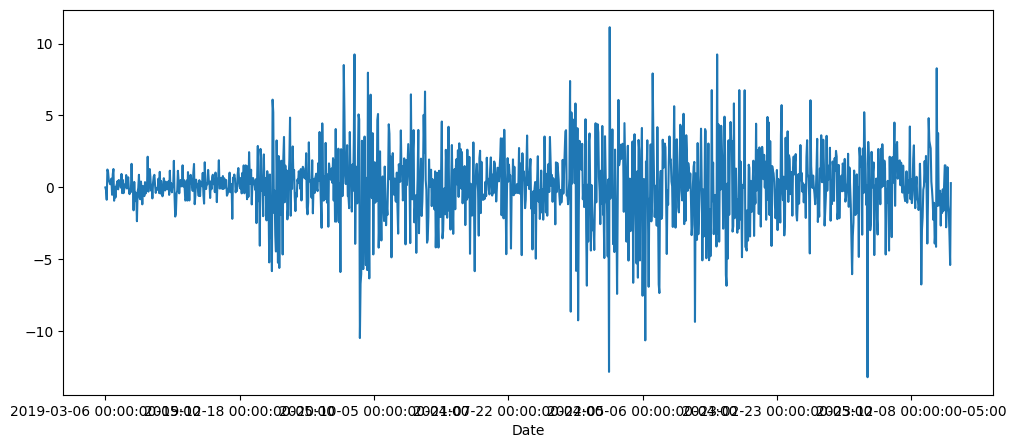

In [165]:
df['Open_diff'].plot(figsize=(12,5))

In [184]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Open_diff'])

# p-value obtained from the ADF test is below 0.05 so data is stationary

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -37.05094702145631
p-value: 0.0
Critical Values:
   1%: -3.435554672689999
   5%: -2.863838402102491
   10%: -2.5679936943096284


In [167]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
step_wise_fit=auto_arima(df['Open_diff'],trace=True,suppress_warnings=True,d=0)
step_wise_fit.summary()





Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5866.588, Time=1.87 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5863.057, Time=0.61 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5862.614, Time=0.66 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5862.473, Time=1.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5863.213, Time=0.52 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5862.968, Time=1.38 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=5863.511, Time=0.73 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5864.870, Time=1.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5862.844, Time=0.46 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 8.336 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1260
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -2928.237
Date:                Sat, 30 Mar 2024   AIC                           5862.473
Time:                        23:25:06   BIC                           5877.890
Sample:                             0   HQIC                          5868.267
                               - 1260                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1024      0.068      1.505      0.132      -0.031       0.236
ma.L1         -0.0466      0.021     -2.259      0.024      -0.087      -0.006
sigma2         6.1111      0.161     37.905      0.000       5.795       6.427
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               456.70
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.70   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [168]:
# Calling Arima model from stats fucntion
from statsmodels.tsa.arima.model import ARIMA

print(df.shape)

train=df.iloc[:-100]
test=df.iloc[-100:] # last 100 for test

(1260, 8)


In [169]:
model=ARIMA(train['Open_diff'],order=(0,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Open_diff   No. Observations:                 1160
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2701.795
Date:                Sat, 30 Mar 2024   AIC                           5409.590
Time:                        23:25:07   BIC                           5424.758
Sample:                             0   HQIC                          5415.313
                               - 1160                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1170      0.070      1.668      0.095      -0.020       0.254
ma.L1         -0.0643      0.021     -3.023      0.003      -0.106      -0.023
sigma2         6.1742      0.168     36.708      0.000       5.845       6.504
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               453.48
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.44   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Start Making Predictions

In [170]:
start=len(train)
end=len(train)+len(test)-1

In [171]:
prediction=model.predict(start=start,end=end,type='levels')
prediction.index=df.index[start:end+1]
print(prediction)

Date
2023-10-12 00:00:00-04:00    0.112480
2023-10-13 00:00:00-04:00    0.116982
2023-10-16 00:00:00-04:00    0.116982
2023-10-17 00:00:00-04:00    0.116982
2023-10-18 00:00:00-04:00    0.116982
                               ...   
2024-02-29 00:00:00-05:00    0.116982
2024-03-01 00:00:00-05:00    0.116982
2024-03-04 00:00:00-05:00    0.116982
2024-03-05 00:00:00-05:00    0.116982
2024-03-06 00:00:00-05:00    0.116982
Name: predicted_mean, Length: 100, dtype: float64


<Axes: xlabel='Date'>

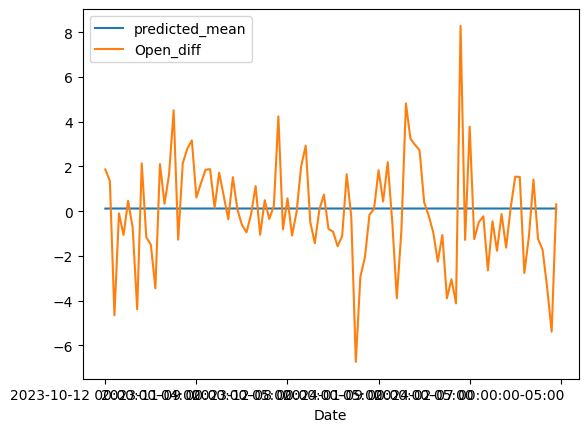

In [186]:
prediction.plot(legend=True)
test['Open_diff'].plot(legend=True)

In [173]:
#to check how good model is doing if mean of data set is close to rms then model is not doing good
# So accordint to this mean of data set is 185 and rsm is 10 so model is doing great in terms of data we have

test['Open_diff'].mean()


-0.06678732644810736

In [174]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
rms=sqrt(mean_squared_error(prediction,test['Open_diff']))
print(f"print mean squared error: {rms}")

mae = mean_absolute_error(prediction, test['Open_diff'])
print(f"mean absolute error: {mae}")

print mean squared error: 2.2951756946086985
mean absolute error: 1.7162559868462497


In [175]:
# Train model for the hole data set now:

model1=ARIMA(df['Open_diff'],order=(0,0,1))
model1=model1.fit()
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open_diff
Date,,,,,,,,
2024-02-29 00:00:00-05:00,181.270004,182.570007,179.529999,180.750000,136682600,0.0,0.0,-1.239990
2024-03-01 00:00:00-05:00,179.550003,180.529999,177.380005,179.660004,73488000,0.0,0.0,-1.720001
2024-03-04 00:00:00-05:00,176.149994,176.899994,173.789993,175.100006,81510100,0.0,0.0,-3.400009
2024-03-05 00:00:00-05:00,170.759995,172.039993,169.619995,170.119995,94983800,0.0,0.0,-5.389999
2024-03-06 00:00:00-05:00,171.059998,171.210007,168.940002,170.020004,39173318,0.0,0.0,0.300003


In [176]:
# Future Value Prediction
# Define the start date
start_date = '2024-03-06 00:00:00-05:00'

# Create the date range for 100 days
date_range = pd.date_range(start=start_date, periods=101, freq='D')
# future_index=date_range(start=, end=)

prediction_whole=model1.predict(start=len(df),end=len(df)+100,type='levels')

prediction_whole.index=date_range

print(prediction_whole)

2024-03-06 00:00:00-05:00    0.105486
2024-03-07 00:00:00-05:00    0.102399
2024-03-08 00:00:00-05:00    0.102399
2024-03-09 00:00:00-05:00    0.102399
2024-03-10 00:00:00-05:00    0.102399
                               ...   
2024-06-10 00:00:00-05:00    0.102399
2024-06-11 00:00:00-05:00    0.102399
2024-06-12 00:00:00-05:00    0.102399
2024-06-13 00:00:00-05:00    0.102399
2024-06-14 00:00:00-05:00    0.102399
Freq: D, Name: predicted_mean, Length: 101, dtype: float64


<Axes: >

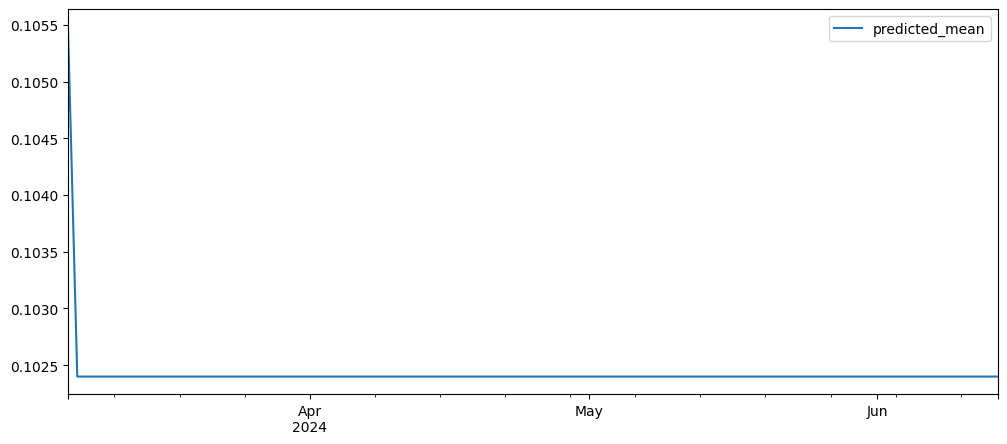

In [177]:
prediction_whole.plot(figsize=(12,5),legend=True)